# Research Design
Based on the data provided, can we determine whether playing as a certain class, as a certain role, or in a specific battleground will earn a character a higher amount of honor points than others? The goal being to find a path of focus for a player to gain the highest amount of honor points.

## Hypotheses to be tested:
The following is the list of the hypotheses outlined in the Research Proposal that will be explored in this notebook.

1. On average, does playing a character in one type of role earn more than playing a character in the other type of role: damage versus healing?
    * Ho = There is no difference between the honor points earned as a damage role character versus a healing role character.
    * Ha = There is a statistically significant difference between the honor points earned as a damage role character versus a healing role character.
2. On average, can a single class of character earn more honor points over the others? There are 12 different classes of characters to explore.
3. On average, can characters earn more honor points in a specific battleground over the others? There are 10 different battlegrounds to be explored.

For the first hypothesis, I will use the Honor column values to analyze statistical significance across role values in the Rol column using a T-Test. For the remaining hypothesis, I will group by the Class and Battleground column values, respectively, utilizing the ANOVA testing to compare the average Honor values among groups. 


# Setting up and getting familiar with the dataset:

In [26]:
# Set up the environment for anlysis:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [27]:
# Read in the dataset:
wowbgs2 = pd.read_csv('https://github.com/wolfy5878/DSI09Capstone1-ExperimentalDesign/raw/main/wowbgs2.csv')

# Check out the data info:
wowbgs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5383 entries, 0 to 5382
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Battleground  5383 non-null   object 
 1   Code          5383 non-null   object 
 2   Faction       5383 non-null   object 
 3   Class         5383 non-null   object 
 4   KB            5383 non-null   int64  
 5   D             5383 non-null   int64  
 6   HK            5383 non-null   int64  
 7   DD            5383 non-null   int64  
 8   HD            5383 non-null   int64  
 9   Honor         5383 non-null   int64  
 10  Win           2723 non-null   float64
 11  Lose          2660 non-null   float64
 12  Rol           5383 non-null   object 
 13  BE            954 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 588.9+ KB


**The column headers decoded from the source of the data:**

* Battleground: Two letter code to indicate the kind of battleground (see decode below).
* Code: code for the battleground team instance (not needed for analysis).
* Faction: faction of the player (Horde or Alliance).
* Class: class of the player (warrior, paladin, hunter, rogue, priest, death knight, shaman, mage, warlock, monk, druid, demon hunter).
* KB: number of mortal kills given by the player.
* D: number of times that the player died.
* HK: number of killings where the player or his/her group contributed.
* DD: damage done by the player.
* HD: healing done by the player.
* Honor: honor awarded to the player.
* Win: 1 if the player won.
* Lose: 1 if the player lost.
* Rol: dps if the player is a damage dealer; heal if the player is focused on healing allies. Note that not all classes can be healers, just shaman, paladin, priest, monk and druid, but all classes can be damage dealers.
* BE: some weeks there is a bonus event, when the honor gained is increased. 1 if the battleground happened during that week.


In [28]:
# Check out the header and tail of the data:
wowbgs2.head()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN


In [29]:
wowbgs2.tail()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
5378,TK,TK40,Horde,Shaman,3,0,47,19154,2611,465,1.0,NaN,dps,1.0
5379,TK,TK40,Alliance,Mage,1,4,12,26117,11492,291,NaN,1.0,dps,1.0
5380,TK,TK40,Alliance,Demon Hunter,2,4,9,39954,9699,282,NaN,1.0,dps,1.0
5381,TK,TK40,Alliance,Paladin,4,6,9,54729,20736,282,NaN,1.0,dps,1.0
5382,TK,TK40,Alliance,Rogue,0,5,10,11495,20355,283,NaN,1.0,dps,1.0


In [30]:
# Checkout descriptive statistics on the data:
wowbgs2.describe()

,KB,D,HK,DD,HD,Honor,Win,Lose,BE
count,5383.000000,5383.000000,5383.000000,5383.000000,5383.000000,5383.000000,2723.0,2660.0,954.0
mean,3.032881,3.050529,26.715400,43880.838752,28290.266766,413.104774,1.0,1.0,1.0
std,3.163663,2.201325,16.102191,34842.726718,39351.377127,214.056282,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.0,1.0,1.0
25%,1.000000,1.000000,14.000000,16838.000000,6526.500000,238.000000,1.0,1.0,1.0
50%,2.000000,3.000000,25.000000,37007.000000,13253.000000,374.000000,1.0,1.0,1.0
75%,5.000000,5.000000,37.000000,62565.000000,29288.000000,537.000000,1.0,1.0,1.0
max,23.000000,13.000000,95.000000,246000.000000,325000.000000,1229.000000,1.0,1.0,1.0


### Dealing with nulls in the dataset:
There are nulls (NaN values) in the Win and Lose columns as well as the BE (Bonus Event) column where 1 = yes and NaN = no. I'm going to do a quick check for data integrity and then determine what to do with the nulls across the dataset.

In [31]:
# Checking to be sure there isn't any issue with there being a 1 or a NaN in both the Win and Lose columns for the same record:
print('Records with yes in both columns:',wowbgs2[(wowbgs2['Win'] == 1) & (wowbgs2['Lose'] == '1')])
print('Records with nulls in both columns:',wowbgs2[(wowbgs2['Win'].isnull()) & (wowbgs2['Lose'].isnull())],'\n')
print('CONCLUSION: Neither of the above return records = no issue with a single record having either situation.')

Records with yes in both columns: Empty DataFrame
Columns: [Battleground, Code, Faction, Class, KB, D, HK, DD, HD, Honor, Win, Lose, Rol, BE]
Index: []
Records with nulls in both columns: Empty DataFrame
Columns: [Battleground, Code, Faction, Class, KB, D, HK, DD, HD, Honor, Win, Lose, Rol, BE]
Index: [] 

CONCLUSION: Neither of the above return records = no issue with a single record having either situation.


In [32]:
# NOTE: There are also nulls (NaN) in the bonus event (BE) column: 1 = yes, NaN = no.
wowbgs2[(wowbgs2['BE'].isnull())]

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5240,SM,SM37,Alliance,Mage,0,4,3,23127,4090,167,NaN,1.0,dps,NaN
5241,SM,SM37,Alliance,Druid,0,2,2,7682,3543,134,NaN,1.0,dps,NaN
5242,SM,SM37,Horde,Druid,3,0,24,33961,6901,510,1.0,NaN,dps,NaN
5243,SM,SM37,Alliance,Priest,1,5,3,17254,3347,167,NaN,1.0,dps,NaN


In [33]:
# DECISION: Changing all null values (NaN) to 0 values for this dataset to facilitate calculations and parsing.
wowbgsdf = wowbgs2.fillna(0)
wowbgsdf

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,0.0,dps,0.0
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,0.0,dps,0.0
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,0.0,1.0,heal,0.0
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,0.0,1.0,heal,0.0
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,0.0,1.0,dps,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,TK,TK40,Horde,Shaman,3,0,47,19154,2611,465,1.0,0.0,dps,1.0
5379,TK,TK40,Alliance,Mage,1,4,12,26117,11492,291,0.0,1.0,dps,1.0
5380,TK,TK40,Alliance,Demon Hunter,2,4,9,39954,9699,282,0.0,1.0,dps,1.0
5381,TK,TK40,Alliance,Paladin,4,6,9,54729,20736,282,0.0,1.0,dps,1.0


# Looking at honor points earned (dependent variable):
First, I'm going to check for normality in the Honor column for the dependent variable on all of our tests.

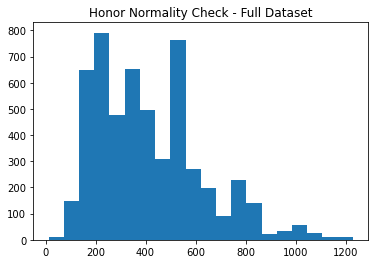

DescribeResult(nobs=5383, minmax=(12, 1229), mean=413.1047742894297, variance=45820.09195602021, skewness=0.8426806224238067, kurtosis=0.3856352044714444)


In [34]:
# Normality checks on Honor Points across the entire dataset:
plt.hist(wowbgsdf['Honor'], bins=20)
plt.title('Honor Normality Check - Full Dataset')
plt.show()
print(stats.describe(wowbgsdf['Honor']))

CONCLUSION: the histogram looks to be mostly normal with a bit of a longer tail on the right, but the skewness and kurtosis scores are well within limits for being normal enough to proceed with parametric testing (both of the values are below 1.0.)

## Bonus event weeks and honor granted:
In the context provided by the collector of the data, battles fought during Bonus Event weeks (BE = 1), more honor is gained in battle during these weeks. This is expected to be an influencing factor on analysis. let's explore to prove it out and decide how to move forward with our analysis.

In [35]:
#First: Split the data into two groups: bonus event weeks and non-bonus event weeks.
print('Bonus Event Weeks:')
wowbgsdf_be = wowbgsdf[(wowbgsdf['BE'] == 1)]
wowbgsdf_be.info()

print('\n','Non-Bonus Event Weeks:')
wowbgsdf_nbe = wowbgsdf[(wowbgsdf['BE'] == 0)]
wowbgsdf_nbe.info()

Bonus Event Weeks:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 58 to 5382
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Battleground  954 non-null    object 
 1   Code          954 non-null    object 
 2   Faction       954 non-null    object 
 3   Class         954 non-null    object 
 4   KB            954 non-null    int64  
 5   D             954 non-null    int64  
 6   HK            954 non-null    int64  
 7   DD            954 non-null    int64  
 8   HD            954 non-null    int64  
 9   Honor         954 non-null    int64  
 10  Win           954 non-null    float64
 11  Lose          954 non-null    float64
 12  Rol           954 non-null    object 
 13  BE            954 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 111.8+ KB

 Non-Bonus Event Weeks:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4429 entries, 0 to 5244
Data columns (total 14 

There are 954 rows of data that were collected during bonus event weeks, so about 18% of the total number of records.

I expect that the Honor data is still normally distributed enough for each group (Bonus Event vs. Non-Bonus Event) to proceed with parametric testing, but let's prove it.

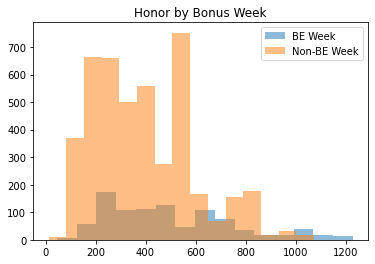

Bonus Event Week:  DescribeResult(nobs=954, minmax=(46, 1229), mean=498.9350104821803, variance=64280.08601327376, skewness=0.7936579515096742, kurtosis=-0.08529072901304424) 

Non-Bonus Event Week:  DescribeResult(nobs=4429, minmax=(12, 1074), mean=394.61706931587264, variance=39928.42062998187, skewness=0.7251433530680809, kurtosis=0.021482558312288624)


In [36]:
# Normality check on honor by bonus week groups:
plt.hist(wowbgsdf_be['Honor'], alpha = .5, label = 'BE Week', bins=15)
plt.hist(wowbgsdf_nbe['Honor'], alpha = .5, label = 'Non-BE Week',bins=15)
plt.legend(loc='upper right')
plt.title('Honor by Bonus Week')
plt.show()

print('Bonus Event Week: ',stats.describe(wowbgsdf_be['Honor']),'\n')
print('Non-Bonus Event Week: ',stats.describe(wowbgsdf_nbe['Honor']))

CONCLUSION: due to the skewness and kurtosis scores of both populations being so close to 0, both of the populations are close enough to normal for us to continue with parametric testing on either or both of them.

Moving foward with the standard t-test see if the two groups have a significant difference (Ho = the Honor awarded for BE weeks is NOT different on average than non BE weeks):

In [37]:
# Performing the t-test to see if the two groups have a significant difference:
stats.ttest_ind(wowbgsdf_be['Honor'],wowbgsdf_nbe['Honor'])

Ttest_indResult(statistic=13.895056932759054, pvalue=3.749179267430651e-43)

The t-score is ~14, which is relatively high, AND the p-value is WAY lower than <0.001.

CONCLUSION: Either of these scores indicates that the honor awarded for BE weeks is significantly different than non-BE weeks.

DECISION: Given that it is known that more honor is given for battles on BE weeks, we're going to focus on the data collected on non-BE weeks to continue with the analysis of our questions.

# Question 1:

On average, does playing a character in one role earn more than playing a character in the other type of role: damage (dps) versus healing (heal)?
* Ho = There is no difference between the honor points earned as a damage role character versus a healing role character.
* Ha = There is a statistically significant difference between the honor points earned as a damage role character versus a healing role character.

In [38]:
# First: Split the non-BE data into two groups based on Rol:
nbe_dps = wowbgsdf_nbe[(wowbgsdf_nbe['Rol'] == 'dps')]
nbe_heal = wowbgsdf_nbe[(wowbgsdf_nbe['Rol'] == 'heal')]

# Validate we didn't filter out any records by accident:
print('Shape of total Non-BE dataframe: ',wowbgsdf_nbe.shape[0],'rows,',wowbgsdf_nbe.shape[1],'columns')
print('Shape of Non-BE dps dataframe: ',nbe_dps.shape[0],'rows,',nbe_dps.shape[1],'columns')
print('Shape of Non-BE heal dataframe: ',nbe_heal.shape[0],'rows,',nbe_heal.shape[1],'columns')

Shape of total Non-BE dataframe:  4429 rows, 14 columns
Shape of Non-BE dps dataframe:  3562 rows, 14 columns
Shape of Non-BE heal dataframe:  867 rows, 14 columns


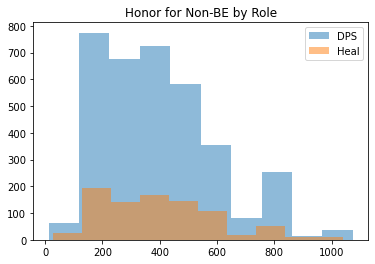

Damage role:  DescribeResult(nobs=3562, minmax=(12, 1074), mean=394.32032565974174, variance=40240.45928346595, skewness=0.7390751254638422, kurtosis=0.02488788981956258) 

Healing role:  DescribeResult(nobs=867, minmax=(29, 1039), mean=395.83621683967704, variance=38689.571296525675, skewness=0.6648026046082989, kurtosis=0.0052283776676294025) 

Skewness and kurtosis on both groups looks good to continue.


In [39]:
# Verify normality to see if we are proceeding, as planned, with parametric testing:
plt.hist(nbe_dps['Honor'], alpha = .5, label = 'DPS')
plt.hist(nbe_heal['Honor'], alpha = .5, label = 'Heal')
plt.legend(loc='upper right')
plt.title('Honor for Non-BE by Role')
plt.show()

print('Damage role: ',stats.describe(nbe_dps['Honor']),'\n')
print('Healing role: ',stats.describe(nbe_heal['Honor']),'\n')
print('Skewness and kurtosis on both groups looks good to continue.')

In [40]:
# Performing the t-test on dps vs heal to see if the two groups have a significant difference:
stats.ttest_ind(nbe_dps['Honor'],nbe_heal['Honor'])

Ttest_indResult(statistic=-0.20030119902749263, pvalue=0.8412542253971906)

The t-score is quite low (approx. -.20) and the p-value is quite a bit higher than 0.05 (approx. 0.84).

CONCLUSION: We choose to accept the null hypothesis: On average, there is no difference between the honor points earned as a damage role character versus a healing role character.

# Question 2:
On average, can a single class of character earn more honor points over the others? There are 12 different classes of characters to explore.

I've already established that the dependent variable data (Honor) is close enough to normal distribution to move forward with analysis. I'm going to compare the means of each pairwise combination of the 12 different player classes using an ANOVA one-way analysis and then, depending on the result of the ANOVA, will run the Tukey HSD test to see if any of the combinations show a statistically significant difference in honor gained.

<AxesSubplot:xlabel='Class', ylabel='Honor'>

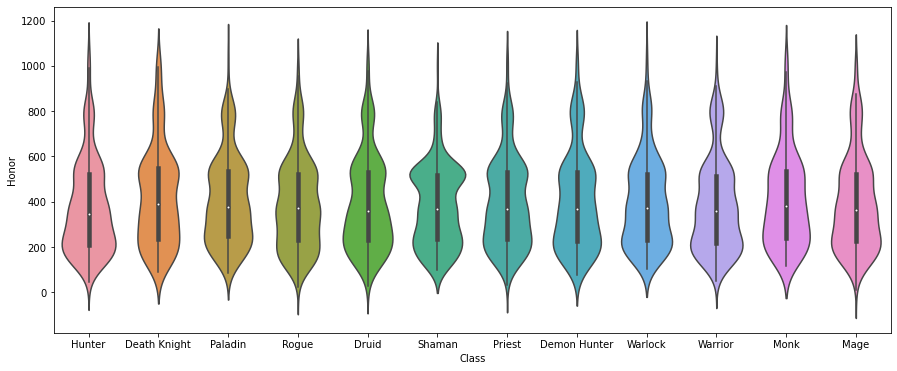

In [41]:
#Let's look at a visual representation of the Honor distribution by Class to see if anything stands out:
plt.figure(figsize=(15,6))
sns.violinplot(x="Class", y="Honor", data=wowbgsdf_nbe)

In [42]:
# Setting up objects for the ANOVA test based on each class-
# warrior, paladin, hunter, rogue, priest, death knight, shaman, mage, warlock, monk, druid, demon hunter:
WA = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Class'] == 'Warrior'), 'Honor']
PA = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Class'] == 'Paladin'), 'Honor']
HU = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Class'] == 'Hunter'), 'Honor']
RO = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Class'] == 'Rogue'), 'Honor']
PR = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Class'] == 'Priest'), 'Honor']
DK = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Class'] == 'Death Knight'), 'Honor']
SH = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Class'] == 'Shaman'), 'Honor']
MA = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Class'] == 'Mage'), 'Honor']
WA = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Class'] == 'Warlock'), 'Honor']
MO = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Class'] == 'Monk'), 'Honor']
DR = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Class'] == 'Druid'), 'Honor']
DH = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Class'] == 'Demon Hunter'), 'Honor']

In [43]:
# Running ANOVA on all class objects outlined above:
stats.f_oneway(WA, PA, HU, RO, PR, DK, SH, MA, WA, MO, DR, DH)

F_onewayResult(statistic=1.3920305959781551, pvalue=0.1691195855038483)

CONCLUSION: The ANOVA one-way analysis returned a p-value that is higher than .05, so we cannot reject the null hypothesis. Which means that, on average, there is no statistically significant difference in playing one class over another to gain more honor points.

# Question 3:
On average, can characters earn more honor points in a specific battleground over the others? There are 10 different battlegrounds to be explored.

I've already established that the dependent variable data (Honor) is close enough to normal distribution to move forward with analysis. I'm going to first run an ANOVA one-way analysis and then compare the means of each pairwise combination of the 10 different battlegrounds using the Tukey HSD test to see if any of the combinations show a statistically significant difference in honor gained.

The battleground value decodes are below:
    
    AB: Arathi basin.
    BG: Battle for Gilneas.
    DG: Deepwind gorge.
    ES: Eye of the storm.
    SA: Strand of the ancients.
    SM: Silvershard mines.
    SS: Seething shore.
    TK: Temple of Kotmogu.
    TP: Twin peaks.
    WG: Warsong gulch.

Let's take a look at a box plot of Honor by each dungeon and see if any visually pop out, then we will run an ANOVA to see if there is any evidence of statistical difference.

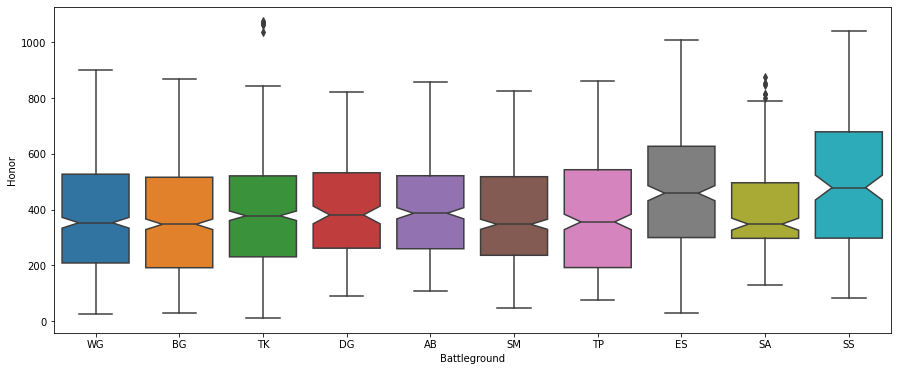

In [49]:
# Boxplot visual of Honor by battleground:
plt.figure(figsize=(15,6))
sns.boxplot(x='Battleground', y='Honor', data=wowbgsdf_nbe, notch=True)
plt.show()

In [44]:
# Setting up objects for the ANOVA test based on each battleground listed above: 
AB = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Battleground'] == 'AB'), 'Honor']
BG = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Battleground'] == 'BG'), 'Honor']
DG = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Battleground'] == 'DG'), 'Honor']
ES = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Battleground'] == 'ES'), 'Honor']
SA = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Battleground'] == 'SA'), 'Honor']
SM = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Battleground'] == 'SM'), 'Honor']
SS = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Battleground'] == 'SS'), 'Honor']
TK = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Battleground'] == 'TK'), 'Honor']
TP = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Battleground'] == 'TP'), 'Honor']
WG = wowbgsdf_nbe.loc[(wowbgsdf_nbe['Battleground'] == 'WG'), 'Honor']

In [45]:
# Running ANOVA on all battleground objects outlined above:
stats.f_oneway(AB, BG, DG, ES, SA, SM, SS, TK, TP, WG)

F_onewayResult(statistic=17.124456292703268, pvalue=4.085306879774708e-28)

In [46]:
# The ANOVA one-way analysis returned a p-value WAY lower than .05.
# Let's run the Tukey HSD test to see which pairwise comparison(s) are statistically different.
nbe_hbattle_tukey = pairwise_tukeyhsd(endog=wowbgsdf_nbe['Honor'], groups=wowbgsdf_nbe['Battleground'], alpha=.05)
nbe_hbattle_tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
AB,BG,-31.0667,0.2362,-69.4452,7.3118,False
AB,DG,10.2979,0.9,-45.3568,65.9526,False
AB,ES,78.2108,0.001,33.2835,123.138,True
AB,SA,-6.5666,0.9,-59.2732,46.1401,False
AB,SM,-5.4708,0.9,-45.2896,34.3479,False
AB,SS,124.9207,0.001,69.3741,180.4674,True
AB,TK,-8.4103,0.9,-46.858,30.0373,False
AB,TP,2.5185,0.9,-41.2316,46.2686,False
AB,WG,-16.9471,0.9,-55.8259,21.9317,False
BG,DG,41.3646,0.2588,-10.631,93.3602,False


In [47]:
# Let's look at the combintations where we are rejecting the null hypothesis of the pairs:
# coerce the tukey hsd results table to a DataFrame
hb_tukey_df = pd.DataFrame(data=nbe_hbattle_tukey._results_table.data[1:], columns=nbe_hbattle_tukey._results_table.data[0])
hb_tdf_reject = hb_tukey_df[(hb_tukey_df['reject']==True)]
hb_tdf_reject

,group1,group2,meandiff,p-adj,lower,upper,reject
2,AB,ES,78.2108,0.0010,33.2835,123.1380,True
5,AB,SS,124.9207,0.0010,69.3741,180.4674,True
10,BG,ES,109.2774,0.0010,68.9717,149.5832,True
13,BG,SS,155.9874,0.0010,104.1075,207.8673,True
17,DG,ES,67.9129,0.0064,10.9120,124.9137,True
20,DG,SS,114.6228,0.0010,48.9261,180.3196,True
24,ES,SA,-84.7773,0.0010,-138.9035,-30.6511,True
25,ES,SM,-83.6816,0.0010,-125.3611,-42.0021,True
27,ES,TK,-86.6211,0.0010,-126.9927,-46.2495,True
28,ES,TP,-75.6923,0.0010,-121.1425,-30.2421,True


CONCLUSION: Between the visual of the Boxplot as well as the numbers in the Tukey HSD results, it becomes visually and numerically clear that the two battlegrounds where a player has a statistically significant chance of gaining more honor points, all other things being equal, are in Seathing Shore (SS) and Eye of the Storm (ES) over the other battlegrounds.

# Summary Conclusion

The overall goal of this research study is to find a path of focus for a player to gain the highest amount of honor points if they were to play in the version of the game that was released at the time of the data collection (2018).

I evaluated several variables that might play into a focused overall approach for maximizing the amount of honor a player could earn. Below lists the variables evaluated and the conclusions based on the statistical analysis run for each:

1. On average, does playing a character in one type of role earn more than playing a character in the other type of role: damage versus healing?
    * Tests conducted: T-Test
    * Conclusion drawn: On average, there is no difference between the honor points earned as a damage role character versus a healing role character.
2. On average, can a single class of character earn more honor points over the others? There are 12 different classes of characters to explore.
    * Test conducted: ANOVA
    * Conclusion drawn: On average, there is no statistically significant difference in playing one class over another to gain more honor points.
3. On average, can characters earn more honor points in a specific battleground over the others? There are 10 different battlegrounds to be explored.
    * Test conducted: ANOVA, Tukey HSD
    * Conclusion drawn: The two battlegrounds where a player has a statistically significant chance of gaining more honor points, all other things being equal, are in Seathing Shore (SS) and Eye of the Storm (ES) over the other battlegrounds.

## Other Considerations

Firstly, this analysis is based on data that was collected between 2017 and 2018 and there have been two major releases since this data was collected that provide other focuses for players outside of Honor points. Having said that, at the time that the data was collected, it is known in the WoW community of players that there are certain in battle strategies that can help maximize how much honor is awarded to you and your team.

One of the major ways to make sure to boost the amount of honor you recieve is to be sure to win the battleground. I have not considered this variable in the analysis, but it could be a confounding factor to some of this analysis and warrants further exploration on a much larger dataset of the same type.

Additionally, spending more time in a battlground will afford more opportunities for honorable kills, which will also boost the amount of honor a player receives during a battleground. 

Another factor is to focus on kills that are honorable as opposed to dishonorable. While Blizzard, the parent company of WoW, hasn't released an official statement of exactly what that means, an honorable kill has to do with making sure that you're killing opponents that are close to you in power and experience level.

And the last I will mention is one I took into consideration when doing the analysis, which is to look for battlegrounds that have Bonus Event weeks attached to them. Those will inherently grant more honor points per playthrough than the same dungeon would without having a Bonus Week boost.